# GDAL - Geospatial Data Access Library

## Open dataset and fetch information

In [1]:
!wget -P data -nc ftp://ftp.nersc.no/nansat/test_data/meris_l1/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1

--2019-10-16 10:24:39--  ftp://ftp.nersc.no/nansat/test_data/meris_l1/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1
           => ‘data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1’
Resolving ftp.nersc.no (ftp.nersc.no)... 10.47.30.29
Connecting to ftp.nersc.no (ftp.nersc.no)|10.47.30.29|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /nansat/test_data/meris_l1 ... done.
==> SIZE MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1 ... 113932155
==> PASV ... done.    ==> RETR MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1 ... done.
Length: 113932155 (109M) (unauthoritative)

MER_FRS_1PNPDK20120 100%[===================>] 108.65M  11.1MB/s    in 9.5s    

2019-10-16 10:24:49 (11.4 MB/s) - ‘data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1’ saved [113932155]



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import gdal


dataset = gdal.Open('data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1')
print ('Size is %d x %d x %d' % (dataset.RasterXSize,
                                dataset.RasterYSize,
                                dataset.RasterCount))
print (dataset.GetMetadata()['MPH_SENSING_START'])

Size is 4481 x 769 x 17
03-MAR-2012 09:38:10.449011


### Access band and fetch raw data

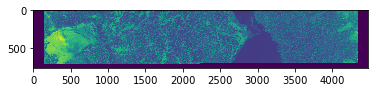

In [3]:
band = dataset.GetRasterBand(1)
array = band.ReadAsArray()
plt.imshow(array)

### Read subsection of the image

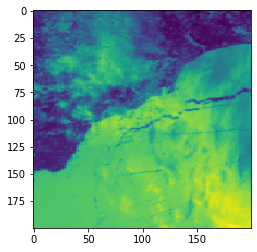

In [4]:
arr1 = band.ReadAsArray(xoff=200, yoff=200,
                        win_xsize=200, win_ysize=200)
plt.imshow(arr1)

### Compute histogram

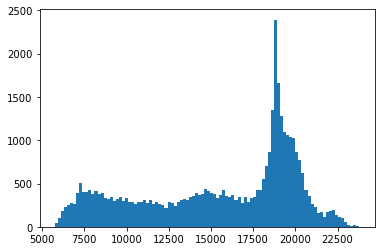

In [5]:
ans = plt.hist(arr1.flatten(), 100)

### Calculate band ratio

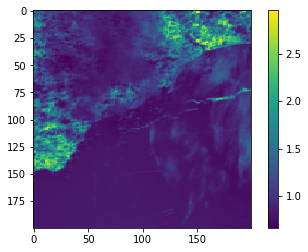

In [6]:
arr2 = dataset.GetRasterBand(8).ReadAsArray(200, 200, 200, 200).astype('float32')
plt.imshow(arr1/arr2);plt.colorbar()

### Create scatter-plot of two bands

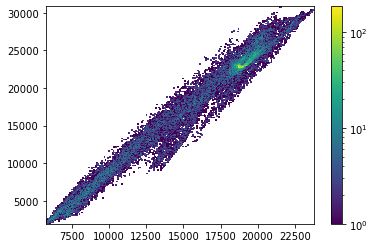

In [7]:
from matplotlib.colors import LogNorm
ans = plt.hist2d(arr1.flatten(), arr2.flatten(), 300, norm=LogNorm())
plt.colorbar()

## Command line tools

### Get information about the dataset 

In [8]:
!gdalinfo data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1

Driver: ESAT/Envisat Image Format
Files: data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1
Size is 4481, 769
Coordinate System is `'
GCP Projection = 
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0,
        AUTHORITY["EPSG","8901"]],
    UNIT["degree",0.0174532925199433,
        AUTHORITY["EPSG","9122"]],
    AUTHORITY["EPSG","4326"]]
GCP[  0]: Id=1, Info=
          (0.5,0.5) -> (34.698006,61.259824,0)
GCP[  1]: Id=2, Info=
          (64.5,0.5) -> (34.427957,61.334252,0)
GCP[  2]: Id=3, Info=
          (128.5,0.5) -> (34.156082,61.408287,0)
GCP[  3]: Id=4, Info=
          (192.5,0.5) -> (33.883449,61.481635,0)
GCP[  4]: Id=5, Info=
          (256.5,0.5) -> (33.612048,61.553771,0)
GCP[  5]: Id=6, Info=
          (320.5,0.5) -> (33.337121,61.625957,0)
GCP[  6]: Id=7, Info=
          (384.5,0.5) -> (33.062217,61.69725,0)
GCP[  7]: Id

### Translate data from one format to another

In [9]:
!gdal_translate -b 1 data/MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1 data/temp1.vrt
!ls -l data
!cat data/temp1.vrt

Input file size is 4481, 769
total 115604
-rw-r--r-- 1 root root 113932155 Oct 16 10:24 MER_FRS_1PNPDK20120303_093810_000000333112_00180_52349_3561.N1
-rw-r--r-- 1 root root     98540 Oct 16 10:25 temp1.vrt
-rwxr-xr-x 1 root root     53357 Nov  6  2017 times_ostia_-120_-130_-5_5.npy
-rwxr-xr-x 1 root root      1047 Sep 20  2017 tsprofile.txt
<VRTDataset rasterXSize="4481" rasterYSize="769">
  <Metadata>
    <MDI key="DS_ATTITUDE_DATA_FILE_NAME">AUX_ATT_AXVIEC20020924_131534_20020703_120000_20781231_235959</MDI>
    <MDI key="DS_DIGITAL_ELEVATION_MODEL_FILE_NAME">AUX_DEM_AXVIEC20031201_000000_20031201_000000_20200101_000000</MDI>
    <MDI key="DS_DIGITAL_ROUGHNESS_MODEL_FILE_NAME">MER_DRM_AXVIEC20020122_083343_20020101_000000_20200101_000000</MDI>
    <MDI key="DS_ECMWF_DATA_FILE_NAME">AUX_ECF_AXNECM20120303_062115_20120303_090000_20120303_210000</MDI>
    <MDI key="DS_INSTRUMENT_DATA_FILE_NAME">MER_INS_AXVACR20080826_192134_20020321_193100_20200101_000000</MDI>
    <MDI key="DS_LAND_SE

### Reproject data from one grid to another

In [10]:
!gdalwarp -t_srs '+proj=longlat' -te 12 61 34 65 -ts 0.1 0.1 -overwrite data/temp1.vrt  data/temp2.tif

pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
pj_obj_create: Open of /opt/conda/share/proj failed
Creating output file that is 4400P x 800L.
Processing data/temp1.vrt [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


### View results of reprojection

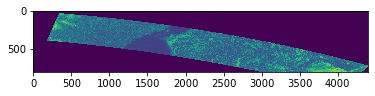

In [11]:
ds = gdal.Open('data/temp2.tif')
b = ds.GetRasterBand(1)
a = b.ReadAsArray()
plt.imshow(a)